### Business Understanding ###
**1. Problem statement**

Kenya’s banking sector faces rising Non-Performing Loans (NPLs) — loans that are not being repaid on time. This reduces bank profitability and threatens financial stability.

The key challenge is:

Can we predict which loans are likely to default so banks can act early?

**2. Why This Matters**


Loan defaults cost banks money.

Predicting defaults early helps banks reduce losses.

Customers can get fairer, data-driven lending decisions.

Strengthens trust and stability in Kenya’s financial system.

**3. Industry and Domain**

Industry: Banking and Financial Services

Domain: Credit Risk Management / Financial Data Science

**4. Target Audience**

Risk managers and credit officers in Kenyan banks

Regulators (e.g., Central Bank of Kenya)

Financial analysts and data scientists

Investors in the banking sector

**5. Impact**

If this predictive system is implemented:

Banks: Reduce non-performing loans and losses.

Customers: Avoid financial distress via proactive support.

Financial ecosystem: Improved trust, stability, and risk management.

Policy makers: Data-driven insights for better regulation.

### Data Understanding

Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")

**Load the Dataset**

In [2]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


**inspecting the data**

In [3]:
#getting basic ifno about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
# getdescriptive statics about numerical columns
df.describe() 

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
# name of the columns in the dataset
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [7]:
#lets check missing values in the dataset
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Lets look at the target variable**

In [8]:
# target variable distribution
df["loan_status"].value_counts(normalize=True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

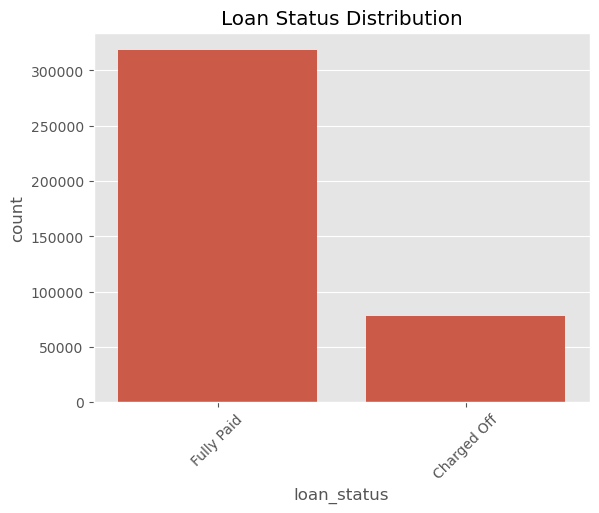

In [9]:
sns.countplot(x="loan_status", data=df)
plt.title("Loan Status Distribution")
plt.xticks(rotation=45)
plt.show()

**Check numerical features Distribution**

In [10]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

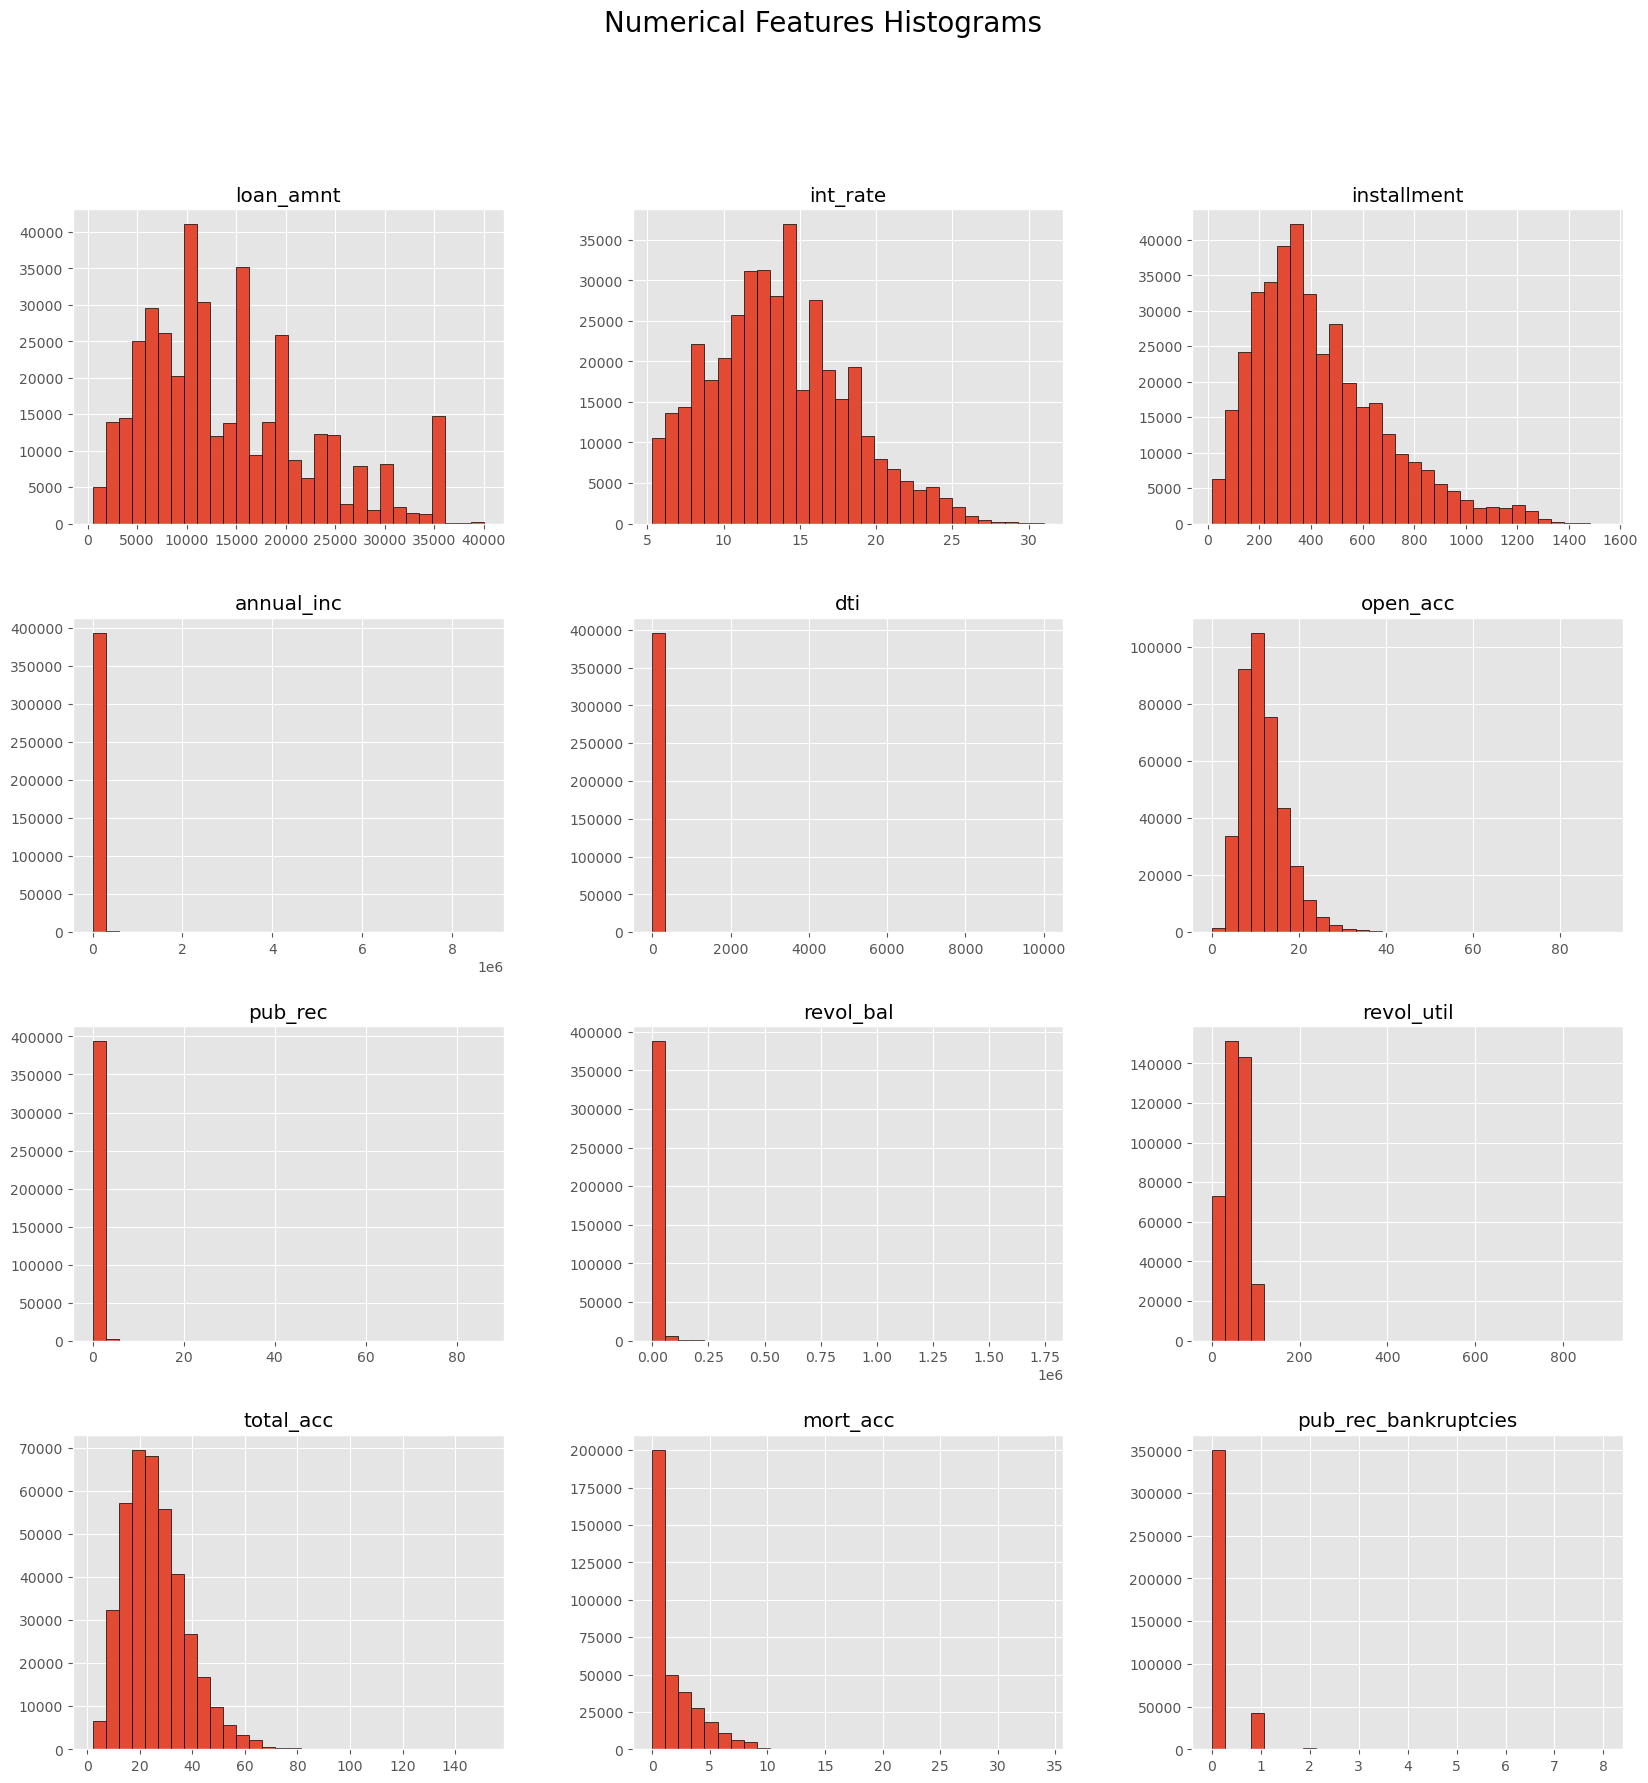

In [11]:
df[num_cols].hist(figsize=(20,20),bins=30,edgecolor='black')
plt.suptitle("Numerical Features Histograms", fontsize=20)
plt.show()

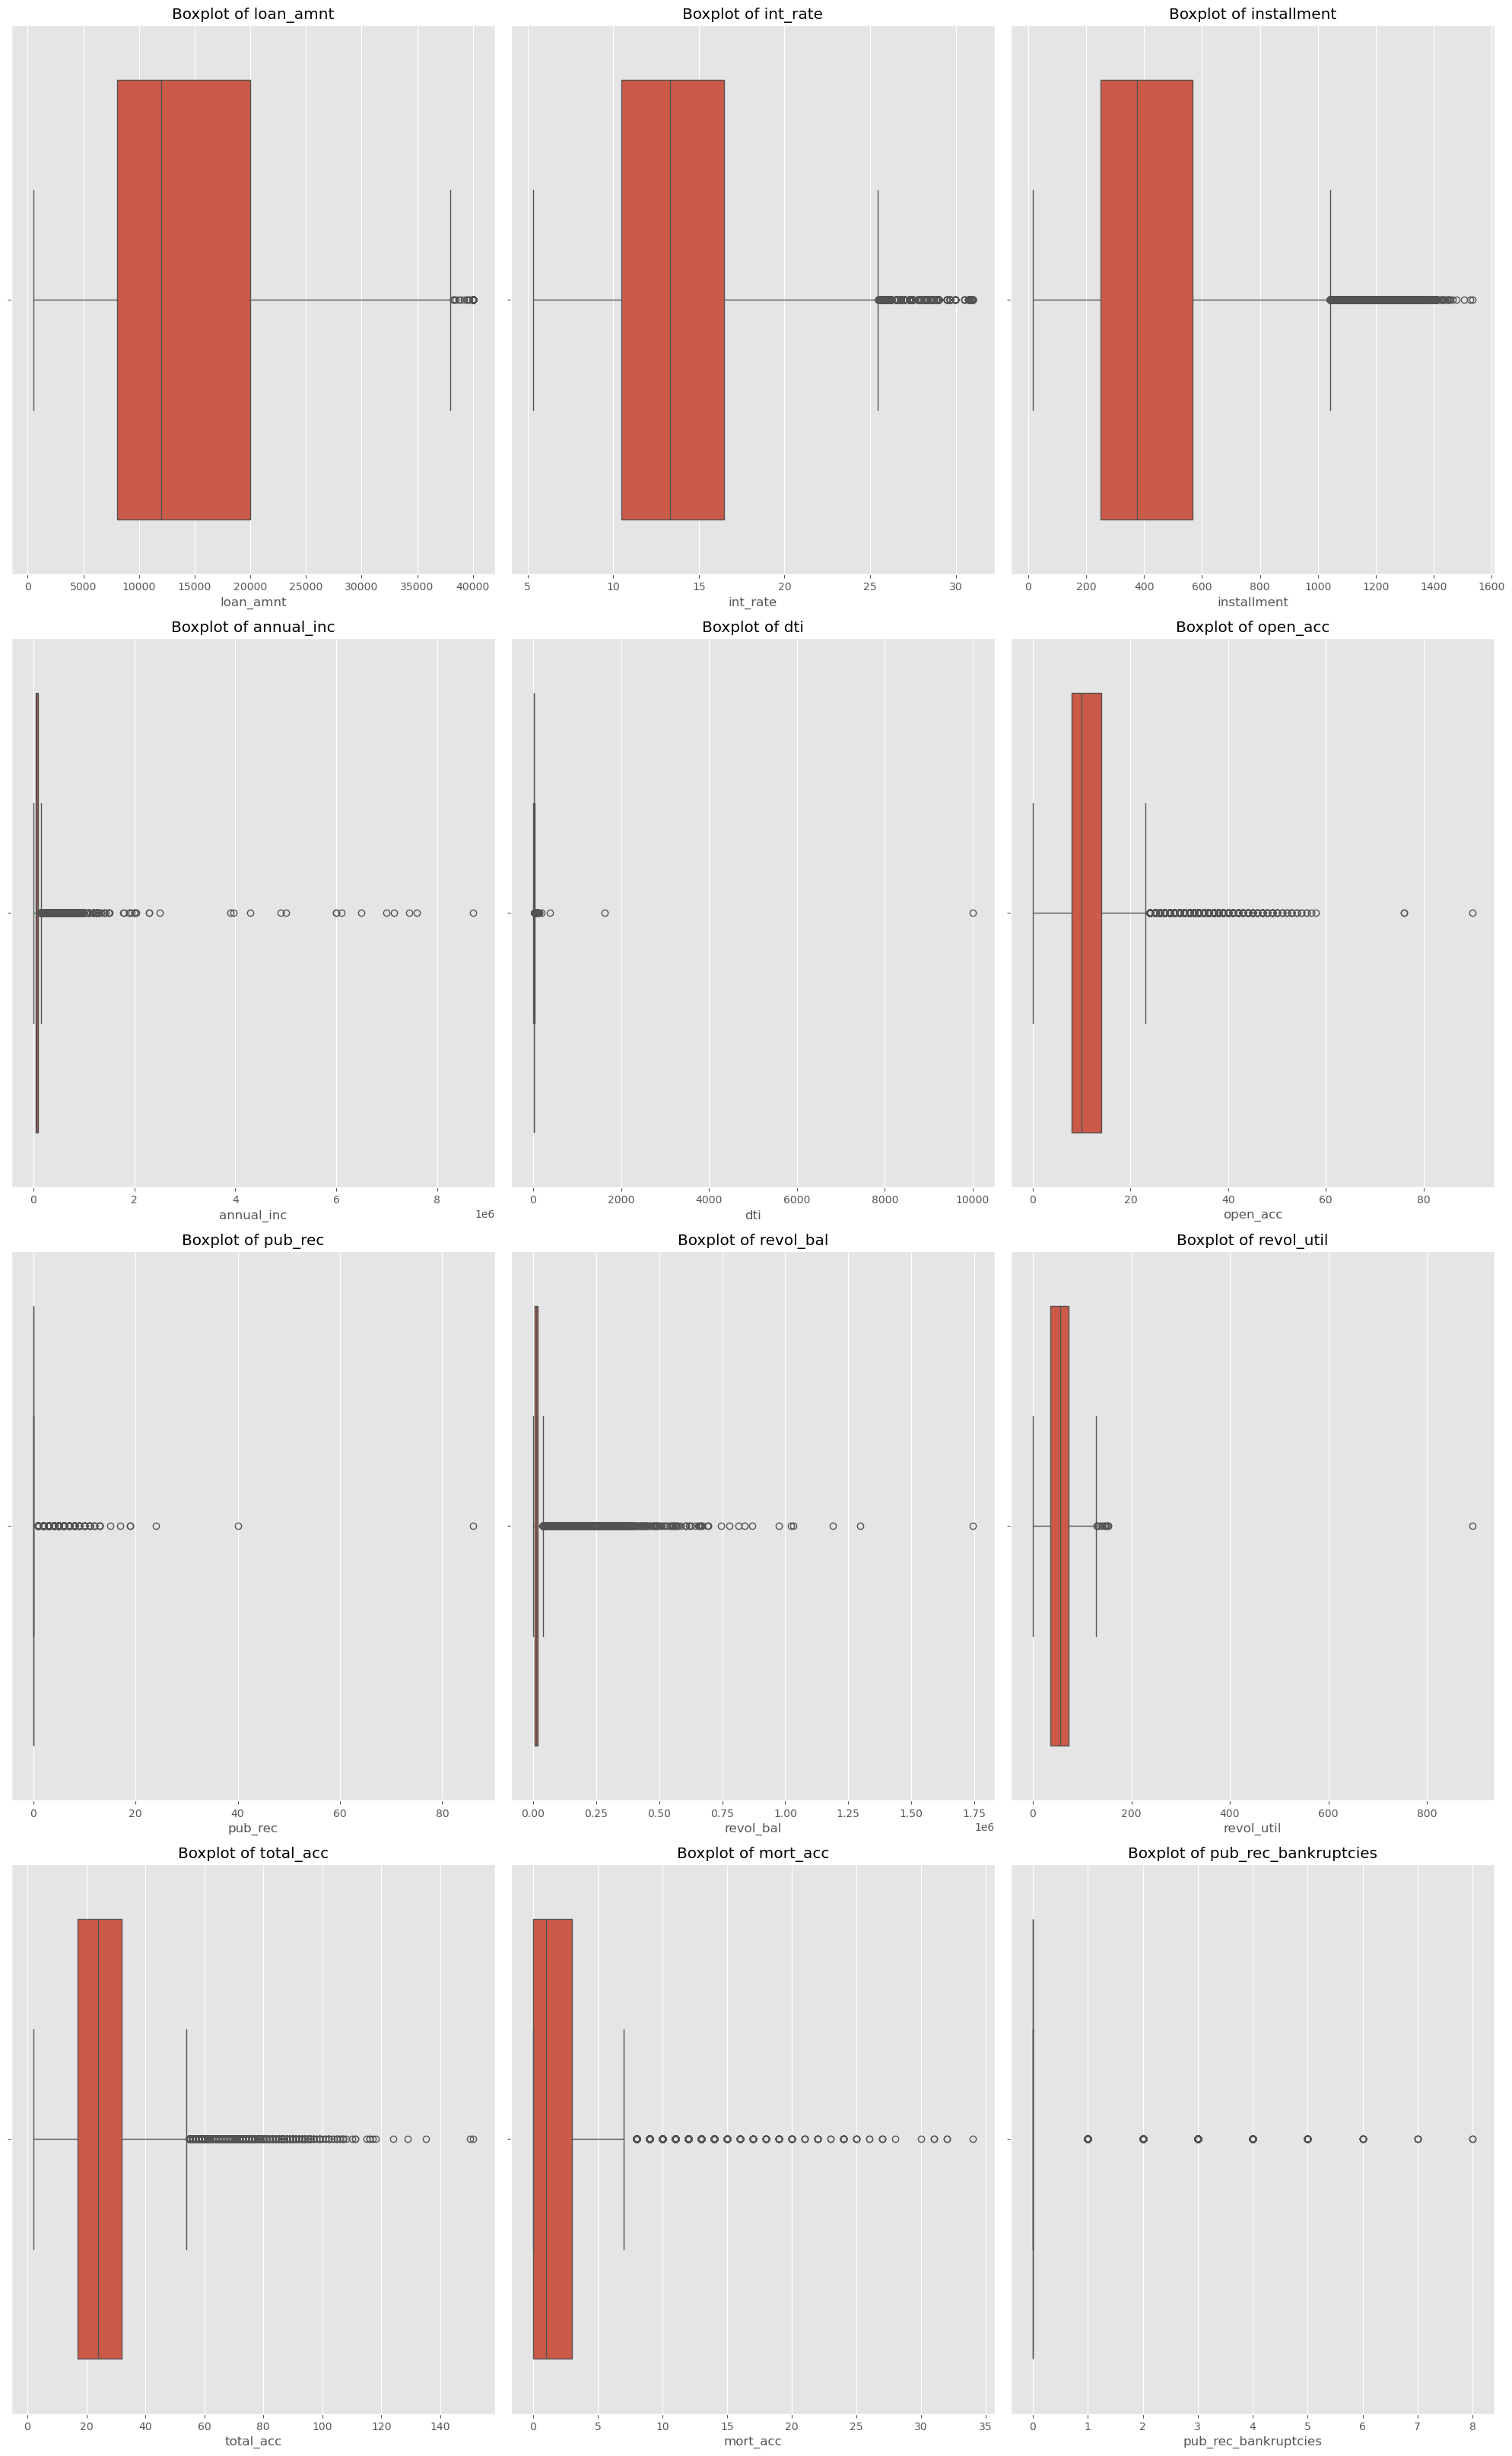

In [12]:
# lets try to detect outliers in the numerical features using boxplots
plt.figure(figsize=(20,40))
for i, col in enumerate(num_cols,1):
    plt.subplot(len(num_cols)//3 +1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [13]:
# lets check for skewness in numerical features
df[num_cols].skew().sort_values(ascending=False)

dti                     431.051225
annual_inc               41.042725
pub_rec                  16.576564
revol_bal                11.727515
pub_rec_bankruptcies      3.423440
mort_acc                  1.600132
open_acc                  1.213019
installment               0.983598
total_acc                 0.864328
loan_amnt                 0.777285
int_rate                  0.420669
revol_util               -0.071778
dtype: float64

**Lets check for Correlations**

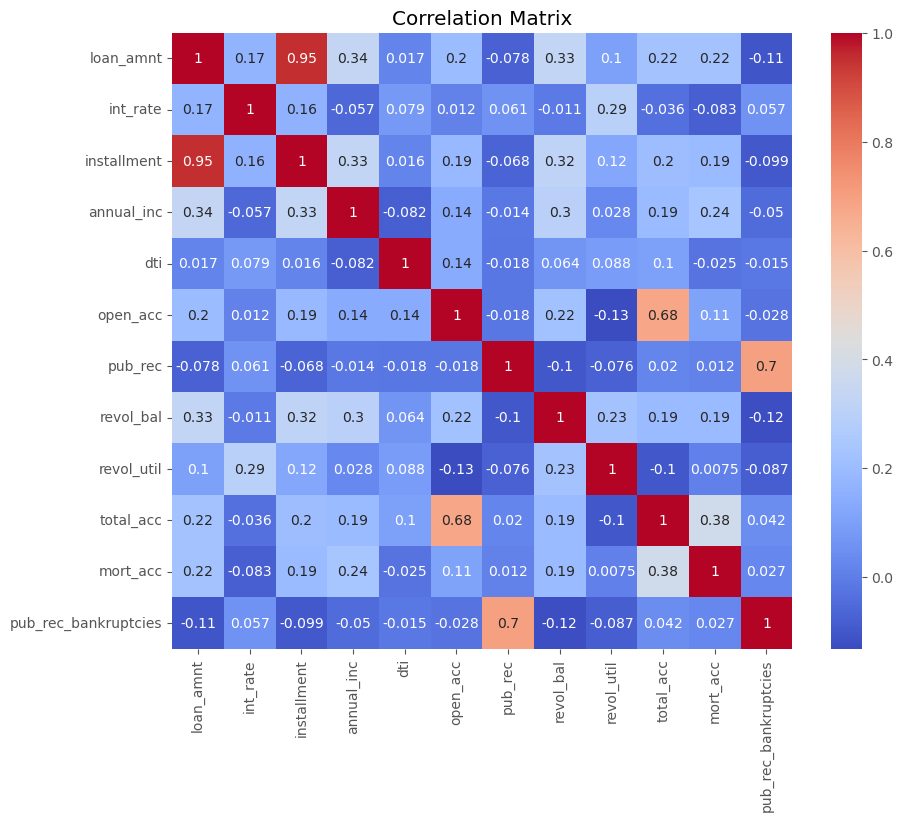

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Data Preparation

In [15]:
# clean column names so they are easy to use


df.columns = df.columns.str.strip().str.replace(' ', '_')

**CHECK IN ON THE TARGET VARIABLE**

In [16]:
# QUICK TARGET CHECK
df["loan_status"].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [17]:
# Make a binary column 1 if charged off else 0 if fully paud of

def map_target(x):
    if x == "Charged Off":
        return 1
    elif x == "Fully Paid":
        return 0
    else:
        return np.nan

In [18]:
# creating the binary target column
df["loan_status_binary"]= df["loan_status"].map(map_target)

In [19]:
df["loan_status_binary"].value_counts()

loan_status_binary
0    318357
1     77673
Name: count, dtype: int64

In [20]:
# convert to int
df["loan_status_binary"]=df["loan_status_binary"].astype(int)

In [21]:
df.drop("loan_status", axis=1, inplace=True)

**MISSING VALUES**

In [22]:
# find columns with missing values and decide on how to handle them
df.isnull().sum().sort_values(ascending=False).head(30)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
earliest_cr_line            0
address                     0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
loan_amnt                   0
dti                         0
term                        0
purpose                     0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
loan_status_binary          0
dtype: int64

In [23]:
# median imputation for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('loan_status_binary') # keep target out
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [24]:
# drop columns that are mostly texts and not useful for simple models
cols_to_drop = ['emp_title', 'title','address']
for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

In [25]:
#mode imputation for categorical columns
cat_cols= df.select_dtypes(include=['object']).columns
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

**Dealing with dates**

In [26]:
df["issue_d"].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [27]:
df["earliest_cr_line"].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [28]:
# Convert dates: extract year from earliest_cr_line (e.g., 'Jan-1985')
if 'earliest_cr_line' in df.columns:
     try:
          df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce').dt.year
     except Exception:
# If parsing fails, try to extract last 4 chars
      df['earliest_cr_line_year'] = df['earliest_cr_line'].str[-4:].astype(float)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15996\2222607643.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce').dt.year


In [29]:
if 'issue_d' in df.columns:
    df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
    df['issue_year'] = df['issue_d'].dt.year
    df['issue_month'] = df['issue_d'].dt.month

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15996\1046788735.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')


In [30]:
# Drop original long date columns if you want
cols_date_drop = ['earliest_cr_line', 'issue_d']
for c in cols_date_drop:
      if c in df.columns:
# Only drop if we created meaningful replacements
        if f'{c}_year' in df.columns or c == 'issue_d':
           df = df.drop(columns=[c])

**ENCODING CATEGORICAL VARIABLES**

In [31]:
# Choosing small-cardinality columns to one-hot encode
one_hot_cols = ['term', 'grade', 'verification_status', 'purpose', 'home_ownership', 'initial_list_status', 'application_type']
one_hot_cols = [c for c in one_hot_cols if c in df.columns]

In [32]:
# Using pd.get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [33]:
# For sub_grade (ordinal like A1, A2...), using simple ordinal mapping
if 'sub_grade' in df.columns:
# Keep sub_grade if present; map A1->1, A2->2 ... G5->35 (example)
   order = []
grades = ['A','B','C','D','E','F','G']
for g in grades:
   for i in range(1,6):
     order.append(f"{g}{i}")
mapper = {k: i+1 for i,k in enumerate(order)}
df['sub_grade_ord'] = df['sub_grade'].map(mapper).fillna(0)
df = df.drop(columns=['sub_grade'])

In [34]:
# If any other object cols remain, do a simple frequency encoding (safe for high-cardinality)
remaining_obj = df.select_dtypes(include=['object']).columns.tolist()
for c in remaining_obj:
   freqs = df[c].value_counts(normalize=True)
   df[f'{c}_freq'] = df[c].map(freqs)
   df = df.drop(columns=[c])

**Handling Skewness**

In [35]:
skewed_cols = ['dti', 'annual_inc', 'revol_bal', 'pub_rec']
skewed_cols = [c for c in skewed_cols if c in df.columns]
for c in skewed_cols:
# only transform if positive values exist
    if (df[c] >= 0).all():
        df[c] = np.log1p(df[c])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   annual_inc                           396030 non-null  float64
 4   dti                                  396030 non-null  float64
 5   open_acc                             396030 non-null  float64
 6   pub_rec                              396030 non-null  float64
 7   revol_bal                            396030 non-null  float64
 8   revol_util                           396030 non-null  float64
 9   total_acc                            396030 non-null  float64
 10  mort_acc                             396030 non-null  float64
 11  pub_rec_bankr

In [37]:
df.to_csv("cleaned_preprocessed_loans_data.csv", index=False)